# Gesture recognition

## 1. Read data and analyze it

In [2]:
import pandas as pd

df = pd.read_csv("gesture_recognition_preprocessed_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gesture  2160 non-null   object 
 1   person   2160 non-null   int64  
 2   sample   2160 non-null   int64  
 3   X1       2160 non-null   float64
 4   X2       2160 non-null   float64
 5   X3       2160 non-null   float64
 6   X4       2160 non-null   float64
 7   X5       2160 non-null   float64
 8   X6       2160 non-null   float64
 9   X7       2160 non-null   float64
 10  X8       2160 non-null   float64
 11  X9       2160 non-null   float64
 12  X10      2160 non-null   float64
 13  X11      2160 non-null   float64
 14  X12      2160 non-null   float64
 15  X13      2160 non-null   float64
 16  X14      2160 non-null   float64
 17  X15      2160 non-null   float64
 18  X16      2160 non-null   float64
 19  X17      2160 non-null   float64
 20  X18      2160 non-null   float64
 21  X19      2160 

In [4]:
df.describe()

person       sample           X1           X2           X3  \
count  2160.000000  2160.000000  2160.000000  2160.000000  2160.000000   
mean      4.000000    14.500000    -0.024866    -0.051616     0.123578   
std       2.582587     8.657446     1.576816     1.457667     1.332476   
min       0.000000     0.000000   -12.801946   -12.443273   -11.884967   
25%       2.000000     7.000000    -0.429610    -0.338096    -0.139949   
50%       4.000000    14.500000    -0.075791    -0.048077     0.015397   
75%       6.000000    22.000000     0.160561     0.122016     0.256573   
max       8.000000    29.000000    18.024894    13.999197     8.864185   

                X4           X5           X6           X7           X8  ...  \
count  2160.000000  2160.000000  2160.000000  2160.000000  2160.000000  ...   
mean      0.580782     1.016860     1.704461     2.417773     2.946049  ...   
std       1.963103     2.487745     3.109137     3.292970     3.410469  ...   
min     -11.705189   -12.343338   -12.926035   -11.480937   -11.708670  ...   
25%      -0.049634    -0.008529     0.037750     0.182857     0.547300  ...   
50%       0.094496     0.239719     0.777734     1.694579     2.339218  ...   
75%       0.663603     1.345762     2.427006     3.535712     4.312666  ...   
max      25.168651    26.664074    23.718458    24.903313    24.809766  ...   

             X11.2        X12.2        X13.2        X14.2        X15.2  \
count  2160.000000  2160.000000  2160.000000  2160.000000  2160.000000   
mean      0.174605     0.057465     0.001565    -0.586741    -0.824816   
std       4.337613     4.037236     3.813810     3.878989     3.519074   
min     -14.996059   -14.054066   -13.162116   -12.113014   -12.113014   
25%      -1.986351    -2.194772    -2.291542    -3.385962    -3.285369   
50%      -0.199365    -0.152256    -0.258330    -0.826354    -0.850320   
75%       2.076746     2.119981     1.994726     1.523909     0.870188   
max      24.645763    22.286277    17.087566    16.913931    16.957036   

             X16.2        X17.2        X18.2        X19.2        X20.2  
count  2160.000000  2160.000000  2160.000000  2160.000000  2160.000000  
mean     -0.575965    -0.371080     0.003852     0.131616     0.110195  
std       2.901284     2.484518     1.823220     1.607587     1.626548  
min     -12.113014   -14.916475   -12.224881   -12.094932   -12.212973  
25%      -2.208202    -1.121020    -0.520717    -0.298054    -0.322132  
50%      -0.400836    -0.188472    -0.056012     0.016854     0.018480  
75%       0.559121     0.430775     0.383102     0.343916     0.344354  
max      16.984467    16.421554    16.014965    15.875274    15.698480  

[8 rows x 62 columns]

Drop unnecessary columns

In [5]:
df.drop(columns=["person", "sample"], inplace=True)

All different gestures

In [6]:
all_gestures = df["gesture"].unique()
print(all_gestures)

['left' 'right' 'up' 'down' 'square' 'triangle' 'circleCw' 'circleCcw']


Print with lineplot

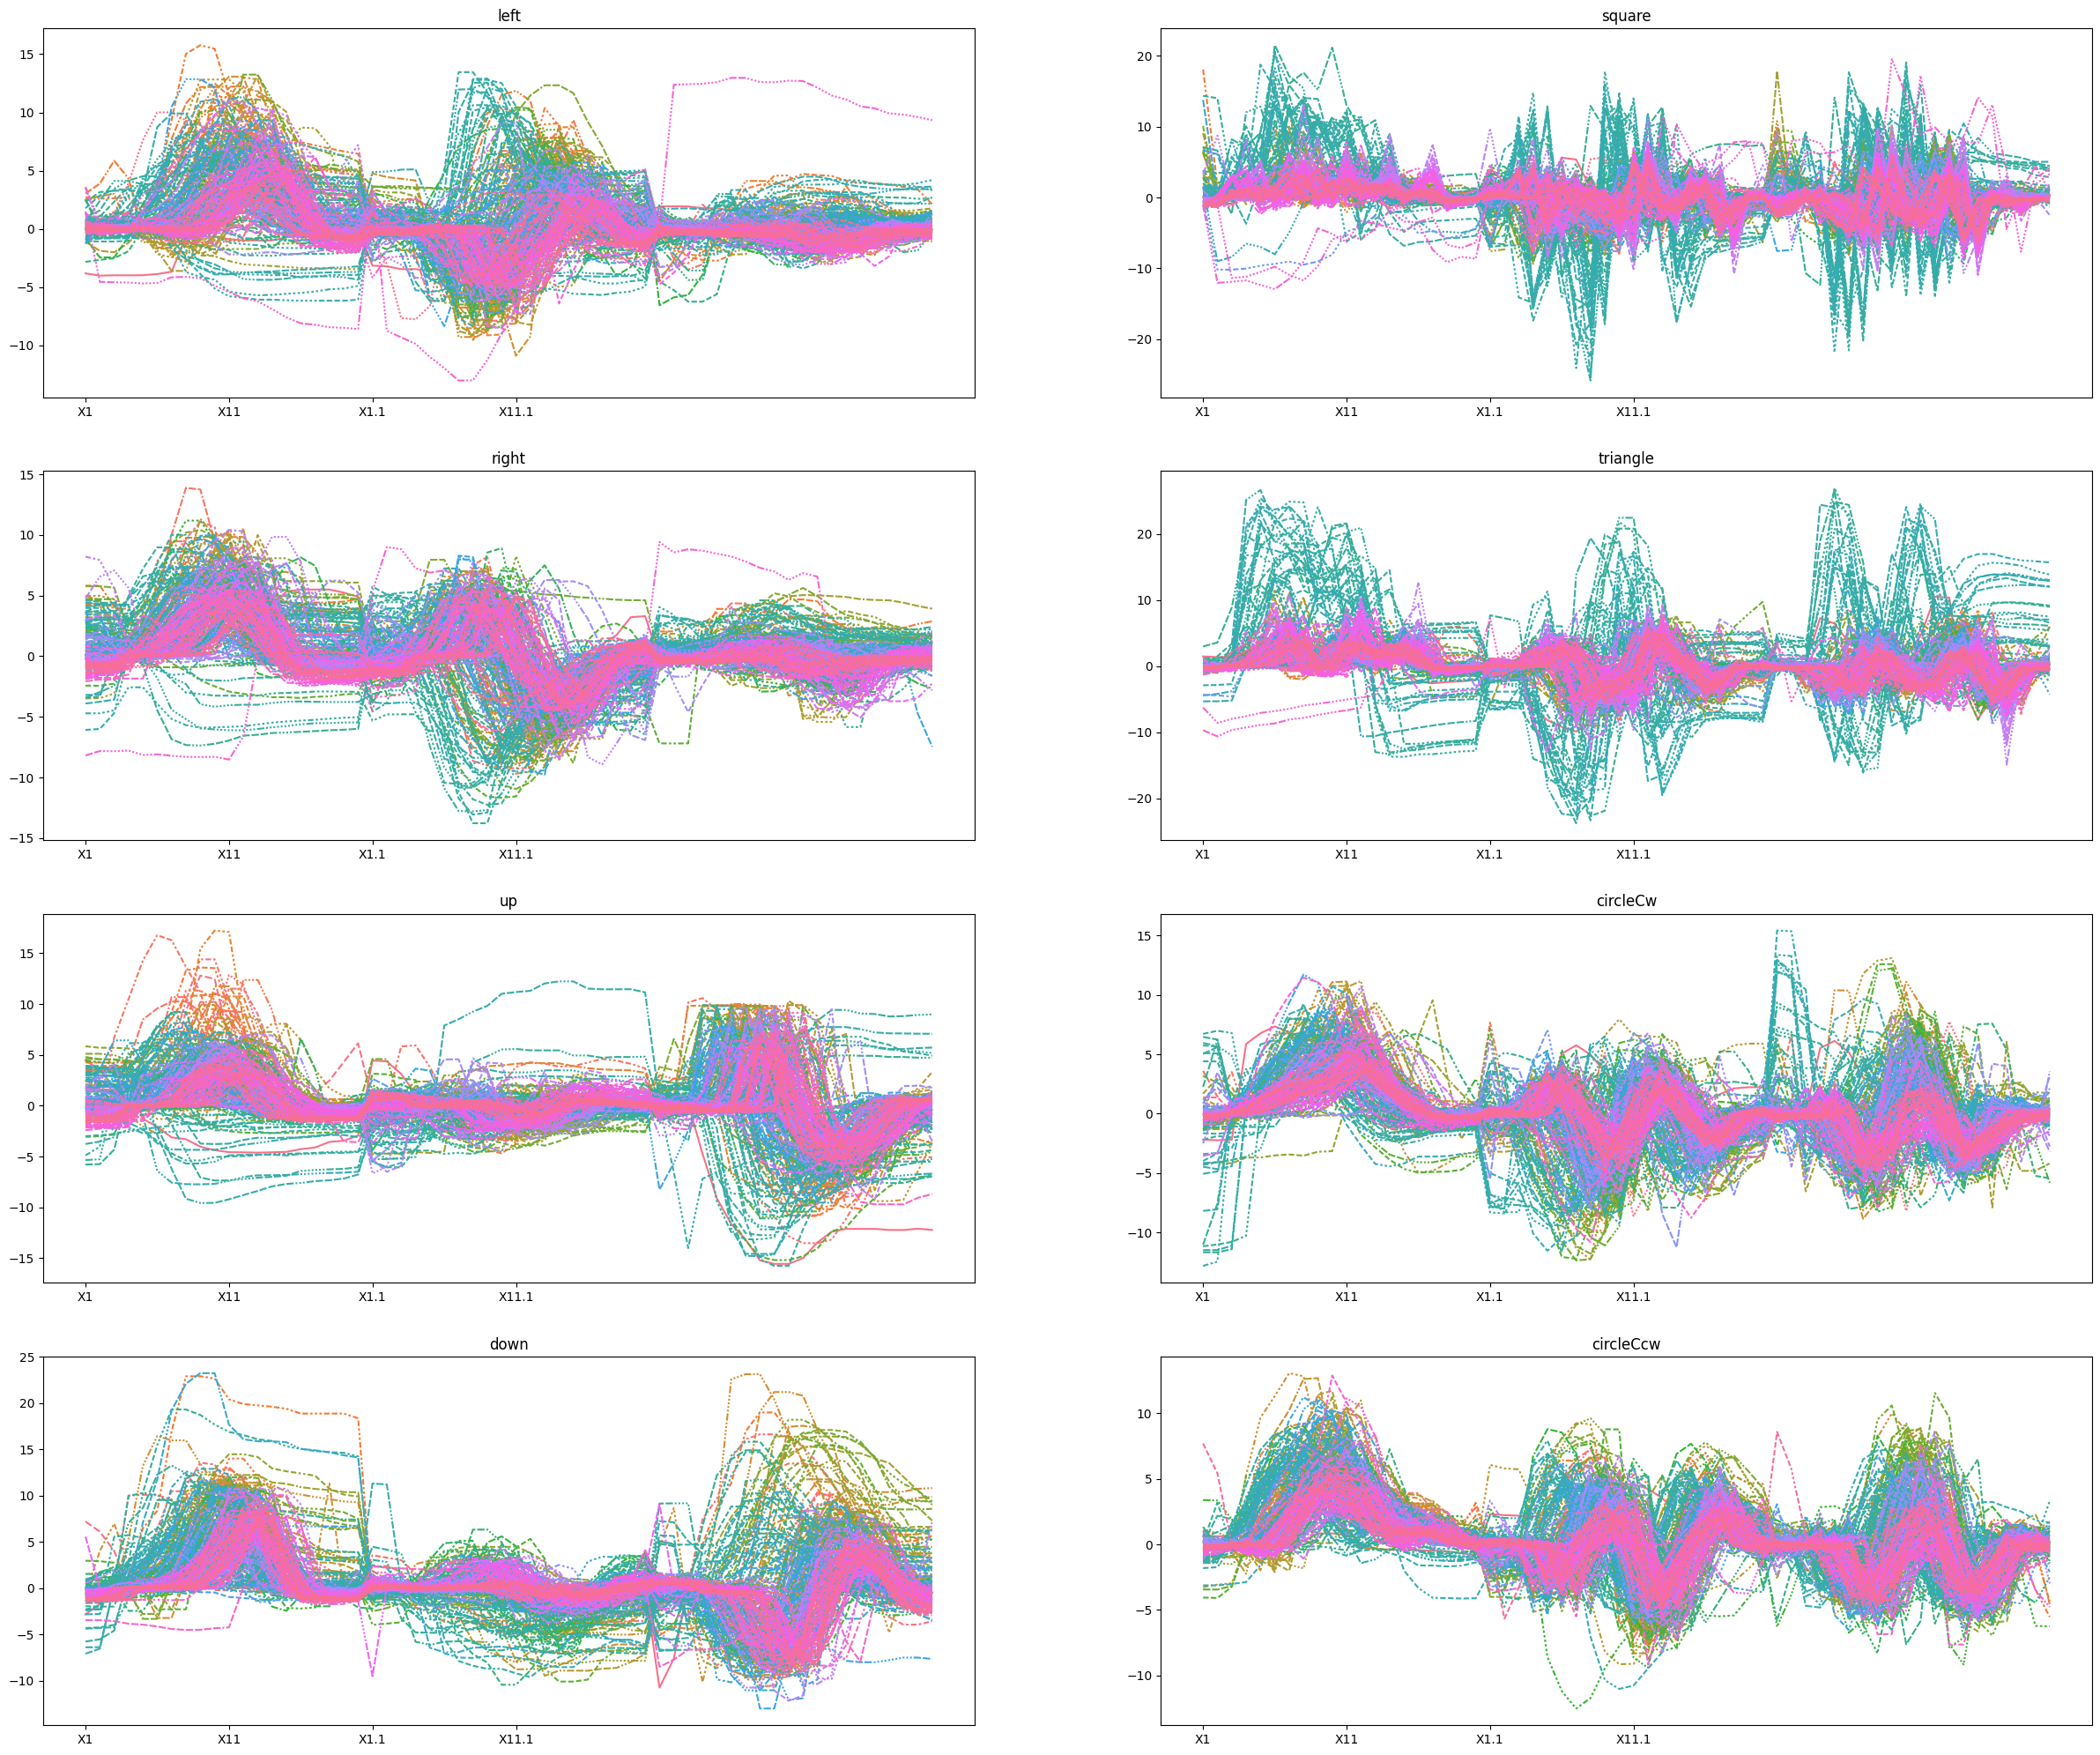

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

(figure, axis) = plt.subplots(4, 2, figsize=(30, 25))

for index, gesture in enumerate(all_gestures):
    row = index % 4
    column = index // 4
    axis[row][column].set_title(gesture)
    axis[row][column].set_xticks(range(0, 40, 10))
    sns.lineplot(df[df["gesture"] == gesture][df.columns.values[1:]].transpose(), legend=False, ax=axis[row][column])
plt.show()

## 2. Preprocess data and feature selection

Normalize features

In [13]:
df_without_gestures = df.loc[:, df.columns != 'gesture']
normalized_df = (df_without_gestures-df_without_gestures.mean()) / df_without_gestures.std()
normalized_df = pd.concat([df[["gesture"]], normalized_df], axis=1)
normalized_df

gesture        X1        X2        X3        X4        X5        X6  \
0          left -2.407940 -2.719250 -3.087907 -2.328847 -2.009276 -1.796563   
1         right  0.085900  0.074381 -0.094499 -0.345957 -0.486943 -0.610777   
2            up  2.844697  2.437756  2.461192  1.090371 -0.927503 -1.213012   
3          down -1.775251 -1.138106 -0.115877 -0.311551 -0.422342 -0.523974   
4        square  0.030764  0.046805 -0.034572  0.430904  0.913907  0.977939   
...         ...       ...       ...       ...       ...       ...       ...   
2155       down -0.685815 -0.695703 -0.840776 -0.267722 -0.387334 -0.532039   
2156     square -0.727476 -0.589882  0.622409  0.314104 -0.522070 -0.341750   
2157   triangle -0.027314 -0.095579 -0.053208  0.041250  0.009753  0.289063   
2158   circleCw -0.118607 -0.085518 -0.080987  0.014291  0.053726  0.085131   
2159  circleCcw -0.188357 -0.149932 -0.305848 -0.418267  0.434690  0.561105   

            X7        X8        X9  ...     X11.2     X12.2     X13.2  \
0    -1.851493 -1.060170 -1.150908  ... -0.060400 -0.025650  0.016814   
1    -0.783981 -0.862267 -0.827692  ... -0.160168 -0.025217  0.117534   
2    -1.680762 -1.830498 -2.123397  ... -3.497468 -3.345785 -3.250260   
3    -0.581697 -0.593046 -0.261214  ... -0.588277  1.417647  2.335292   
4     0.437961 -0.207397 -0.293072  ... -0.702902 -1.088322 -0.191767   
...        ...       ...       ...  ...       ...       ...       ...   
2155 -0.717682 -0.838948 -0.738579  ... -1.654124 -1.353036 -0.256070   
2156  0.469433 -0.118322 -1.002761  ... -0.965473  0.201364  0.775127   
2157  0.254145 -0.787876 -1.091935  ... -0.705247 -0.679461  0.077390   
2158  0.018143  0.108826  0.248575  ...  0.338393 -0.032101 -1.166913   
2159  0.656107  0.459880  0.234312  ...  0.230905 -0.675093 -1.025169   

         X14.2     X15.2     X16.2     X17.2     X18.2     X19.2     X20.2  
0     0.168196  0.237914  0.237977  0.147791 -0.005642 -0.103095 -0.103995  
1     0.392476  0.542442  0.668392  0.702250  0.744918  0.662834  0.637317  
2    -2.971463 -3.207718 -3.976532 -4.767859 -6.707219 -7.605526 -7.576270  
3     2.116514  0.877067  0.015807 -0.303574 -0.607092 -0.555101 -0.377134  
4     0.110234  0.233610  0.250871  0.093586  0.288621  0.464148  0.158933  
...        ...       ...       ...       ...       ...       ...       ...  
2155  0.688284  0.968609  1.096362  1.054343  0.594888 -0.035703 -0.504090  
2156 -0.977473 -1.030216  0.169277 -0.117935 -0.136795 -0.351065 -0.244658  
2157  0.560519 -0.233920 -0.836839 -1.149071 -0.458699 -0.367261 -0.392405  
2158 -0.961629 -0.337069 -0.329776 -0.190158 -0.232492 -0.186986 -0.071060  
2159 -0.698665 -0.270605 -0.124103  0.423033 -0.113084 -0.271852 -0.185136  

[2160 rows x 61 columns]

Add features

Trying to add a feature where the raw values gets summed up.

<AxesSubplot: xlabel='gesture', ylabel='raw_count_y'>

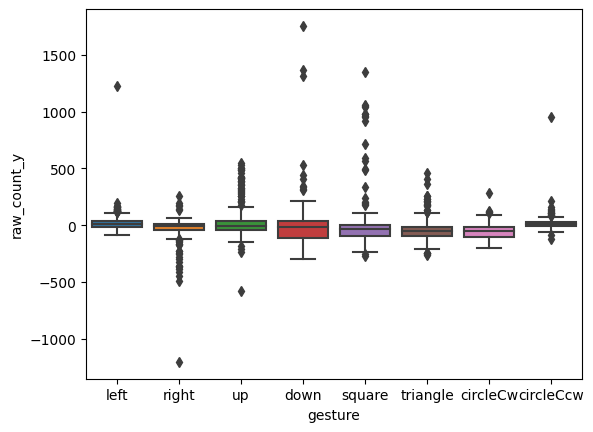

In [20]:
raw_wear_z = pd.read_csv("raw/raw_data_wear_z.csv")
normalized_df["raw_count_z"] = raw_wear_z.sum(axis='columns',numeric_only=True)
normalized_df.head()
sns.boxplot(normalized_df, x="gesture", y="raw_count_z")

As can be seen in the boxplot it does not really help to differentiate between the features.
That's why the amount of raw values for each raw gets used because they are very different for all gestures.

<AxesSubplot: xlabel='gesture', ylabel='raw_count_z'>

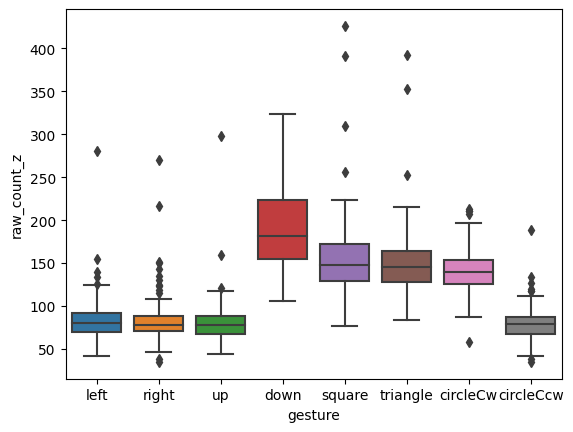

In [21]:
normalized_df["raw_count_z"] = raw_wear_z.count(axis='columns',numeric_only=True)
normalized_df.head()
sns.boxplot(normalized_df, x="gesture", y="raw_count_z")

Remove outliers

In [24]:
X = normalized_df.drop(columns=["gesture"])
y = df["gesture"]

X.clip(lower=X.quantile(0.1), upper=X.quantile(0.99), axis=1, inplace=True)

Scaling the values

<AxesSubplot: ylabel='Density'>

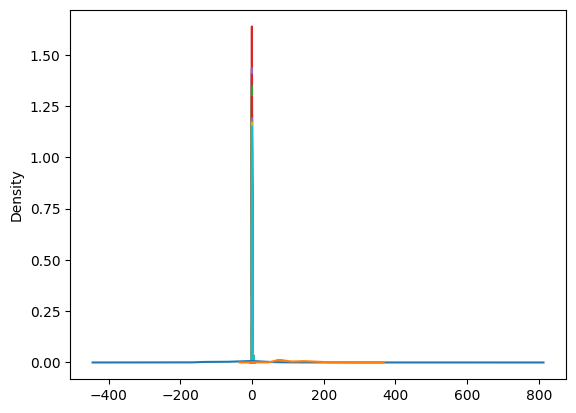

In [29]:
X.plot.density(legend=False)

<AxesSubplot: ylabel='Density'>

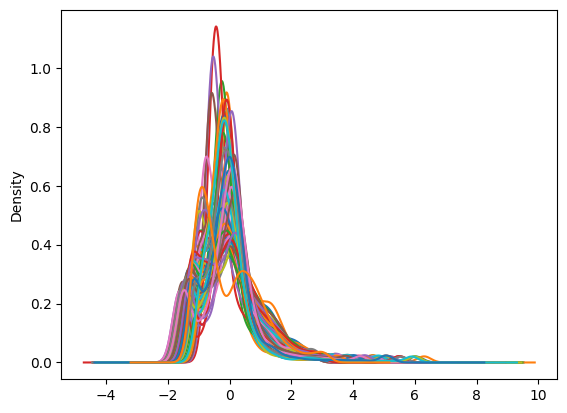

In [32]:
from sklearn import preprocessing

scalar = preprocessing.StandardScaler().fit(X, y)
X_Scaled = pd.DataFrame(scalar.transform(X), columns=X.columns)
X_Scaled.plot.density(legend=False)

## 3. Apply ml models

Create train/test split

In [ ]:
from sklearn.model_selection import train_test_split

# TODO Use StratifiedShuffleSplit
# https://stackoverflow.com/questions/61299828/stratify-argument-in-train-test-split-vs-stratifiedshufflesplit#:~:text=These%20two%20modules%20perform%20different,this%20in%20a%20stratified%20way.&text=Provides%20train%2Ftest%20indices%20to,data%20in%20train%2Ftest%20sets.
X_train, X_test, y_train, y_test = train_test_split(
             X_Scaled, y, test_size = 0.2, random_state=42, stratify=df['gesture'])

Train models

In [ ]:
# TODO

## 4. Test different models